# Auswertung - Verteilung der Daten

In diesem ersten Abschnitt soll die Verteilung, der bei der Evaluierung vom 12.6 - 14.6 erhobenen Daten, festgestellt werden. Dabei ist einersteits interessant wie viele Datenpunkte pro Person, Area of Interest (AOI) bzw. pro Position erhoben wurden. Dieses erste Teil der Auswertung soll daher einen ersten Überblick über die erobenen Daten gewähren und zusätzlich Indiezien darüber liefern, welche erste Limitationen für das, der Evaluation zu grundelegende, System erkannt werden können.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import math

from datetime import datetime

In [2]:
root = '../0_annotation'
file_names = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        if 'annotation' not in file or '.csv' not in file:
            continue
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))

# Frage 1: Gesamtzahl der gesammelten Daten

In [3]:
info_titles = [
    'Frames',
    'Zeitpunkt',
    'Test Person',
    'Frames mit Gesicht',
    'Frames mit Blick',
    'Dateipfad'
]

# Important vars for further analysis

info_data = []
counter_gaze = []
frames_with_face = []
testers = []
aoi_hits = {}
position_hits = {}
positions_by_aoi_hits = []

for f in file_names:
    df = pd.read_csv(f, sep=',', engine='python')
    
    # meta data
    count_total = len(df['frame'])
    last_ts = datetime.fromtimestamp(df['server_timestamp'][count_total - 1])
    test_person = str((df['annotation_test_person_id'][count_total - 1]))[:-1]
    
    # gaze & face hits
    count_face = len(df[(df[['eye_lmk_X_0','eye_lmk_Y_0','eye_lmk_Z_0']] != 0).all(axis=1)]['frame'])
    count_gaze = len(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['frame'])
    
    # aoi & positions hits
    uniqueValues, occurCount = np.unique(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['annotation_aoi'],
                                         return_counts=True)
    current_aois = occurCount
    
    uniqueValues, occurCount = np.unique(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['annotation_pos'],
                                         return_counts=True)
    current_positions = occurCount
    
    # aoi vs. positions hits
    tempFrame = df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]
    result_pos_aoi = tempFrame.groupby(['annotation_pos','annotation_aoi']).size().reset_index().rename(columns={0:'count'})

    # extract data separately
    info_data.append([count_total, last_ts, test_person, count_face, count_gaze, f])
    counter_gaze.append(count_gaze)
    frames_with_face.append(count_face)    
    positions_by_aoi_hits.append(result_pos_aoi)
    
    aoi_hits['tester_' + test_person] = current_aois
    position_hits['tester_' + test_person] = current_positions
    
    testers.append(test_person)

pd.DataFrame(info_data, columns=info_titles)

,Frames,Zeitpunkt,Test Person,Frames mit Gesicht,Frames mit Blick,Dateipfad
0,13013,2019-06-12 09:44:18,01,13013,245,../0_annotation/01__annotation_2019_06_12_10_2...


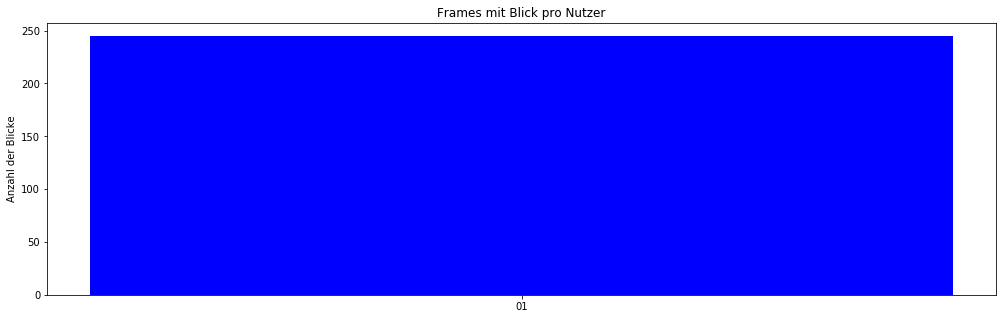

In [4]:
y_pos = np.arange(len(testers))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

plt.bar(y_pos, counter_gaze, align='center', color = 'b')
plt.xticks(y_pos, testers)
plt.ylabel('Anzahl der Blicke')
plt.title('Frames mit Blick pro Nutzer')

plt.show()

# Frage 2: Verhältnis von “Erkannt” und “Nicht-Erkannt”

Frames mit Gesicht: 13013
Frames mit Blick: 245
Verhältnis zwischen Gesicht (98.15%) und Blick(1.85%)


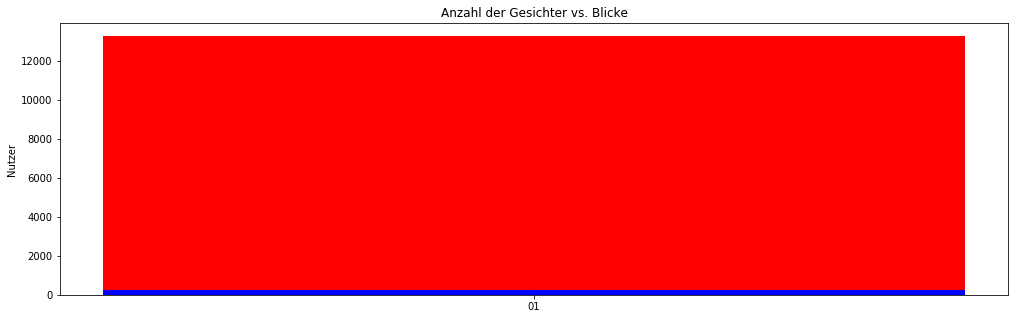

In [5]:
y_pos = np.arange(len(testers))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

plt.bar(y_pos, counter_gaze, align='center', color = 'b')
plt.bar(y_pos, frames_with_face, align='center', color = 'r', bottom = counter_gaze)
plt.xticks(y_pos, testers)
plt.ylabel('Nutzer')
plt.title('Anzahl der Gesichter vs. Blicke')

sum_face = np.sum(frames_with_face)
sum_gaze = np.sum(counter_gaze)

percent_face = str(round(sum_face / ((sum_face + sum_gaze)/100), 2))
percent_gaze = str(round(sum_gaze / ((sum_face + sum_gaze)/100), 2))


print("Frames mit Gesicht: " + str(sum_face))
print("Frames mit Blick: " + str(sum_gaze))
print("Verhältnis zwischen Gesicht (" + percent_face + "%) und Blick(" + percent_gaze + "%)")

plt.show()

# Frage 3: Verteilung der Hits auf die einzelnen AOIs 

## Verteilung der Hits auf AOIs - gesamt

Text(0.5, 1.0, 'AOIs')

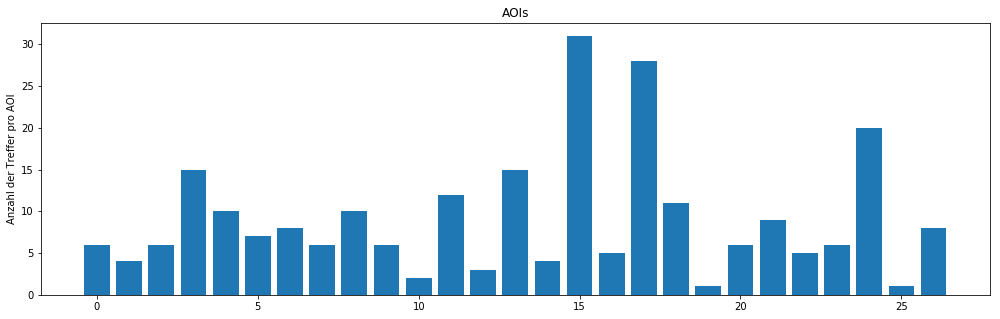

In [6]:
y_pos = np.arange(len(aoi_hits['tester_01']))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)
plt.bar(y_pos, sum(aoi_hits[key] for key in aoi_hits), align='center')

plt.ylabel('Anzahl der Treffer pro AOI')
plt.title('AOIs')

## Verteilung der Hits  auf AOIs - pro Nutzer

Text(0.5, 1.0, 'Nutzer')

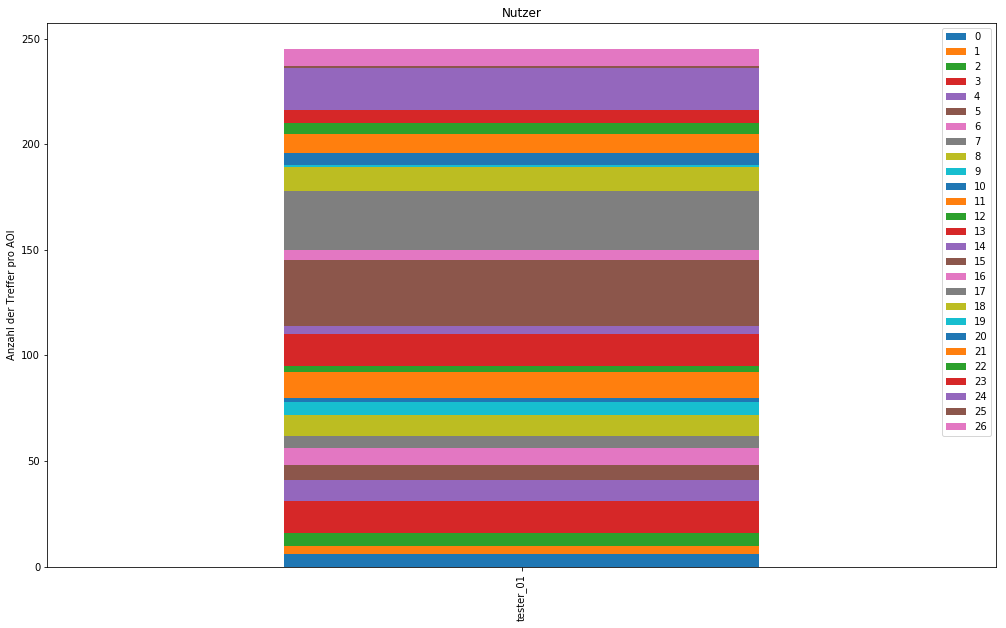

In [7]:
plt.rcParams["figure.figsize"] = (17, 10) # (w, h)

df=pd.DataFrame(aoi_hits).transpose()
df.plot(kind='bar', stacked=True)

plt.ylabel('Anzahl der Treffer pro AOI')
plt.title('Nutzer')

# Frage 4: Verteilung der Hits auf die einzelnen Positionen

## Verteilung der Hits auf Positionen - gesamt

Text(0.5, 1.0, 'AOIs')

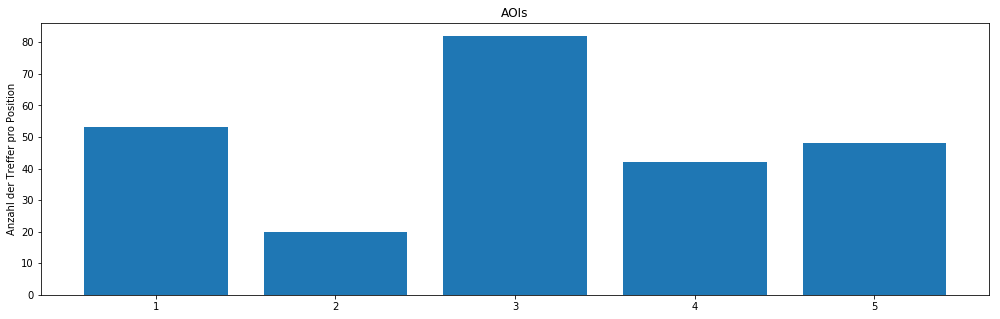

In [8]:
y_pos = np.arange(len(position_hits['tester_01']))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)
plt.bar(y_pos+1, sum(position_hits[key] for key in aoi_hits), align='center')

plt.ylabel('Anzahl der Treffer pro Position')
plt.title('AOIs')

## Verteilung der Hits auf Positionen - pro Nutzer

Text(0.5, 1.0, 'Nutzer')

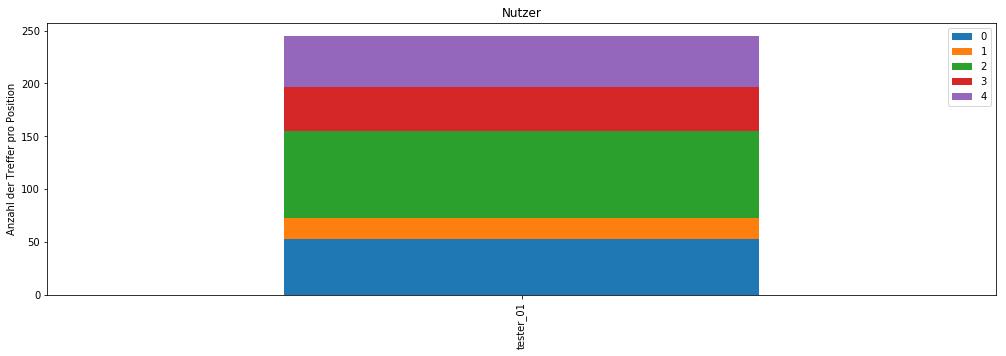

In [9]:
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

df=pd.DataFrame(position_hits).transpose()
df.plot(kind='bar', stacked=True)

plt.ylabel('Anzahl der Treffer pro Position')
plt.title('Nutzer')

# Frage 5: Verteilung der Hits auf die AOIs pro Position

In [35]:
y_pos = np.arange(len(range(29)))

test = (positions_by_aoi_hits[['annotation_pos']] == 2).all(axis=1).value_counts()
print(test)
#plt.rcParams["figure.figsize"] = (17, 3) # (w, h)
#plt.bar(y_pos+1, positions_by_aoi_hits[0]['count'], align='center')

#plt.ylabel('Anzahl der Treffer pro Position')
#plt.title('Positons')

False    75
True     13
dtype: int64
